In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [56]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_train.head()

<IPython.core.display.Javascript object>

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [57]:
df_train.shape

(30161, 14)

In [58]:
df_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [59]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [60]:
for i in df_train.columns:
    print(df_train[i].value_counts())

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: age, Length: 72, dtype: int64
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64
9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64
 Married-civ-spouse       14065
 Never-marrie

In [61]:
df_train['workclass'].value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [62]:
df_train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='workclass', ylabel='count'>

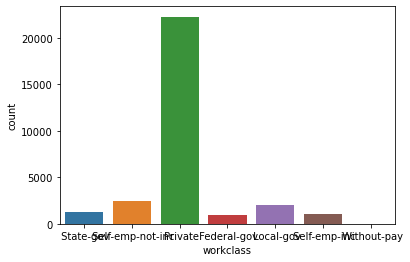

In [63]:
sns.countplot(df_train['workclass'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='education'>

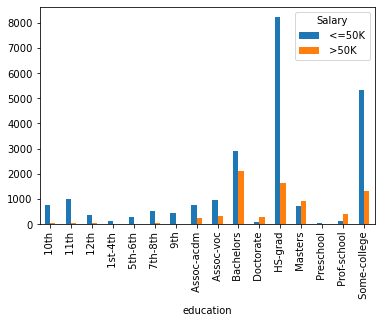

In [64]:
pd.crosstab(df_train['education'],df_train['Salary']).plot(kind='bar')

In [65]:
df_train.groupby(['education','maritalstatus']).count()

age  workclass  educationno  \
education     maritalstatus                                          
 10th          Divorced                106        106          106   
               Married-civ-spouse      327        327          327   
               Married-spouse-absent    15         15           15   
               Never-married           299        299          299   
               Separated                39         39           39   
...                                    ...        ...          ...   
 Some-college  Married-civ-spouse     2679       2679         2679   
               Married-spouse-absent    70         70           70   
               Never-married          2542       2542         2542   
               Separated               210        210          210   
               Widowed                 151        151          151   

                                      occupation  relationship  race   sex  \
education     maritalstatus                                                  
 10th          Divorced                      106           106   106   106   
               Married-civ-spouse            327           327   327   327   
               Married-spouse-absent          15            15    15    15   
               Never-married                 299           299   299   299   
               Separated                      39            39    39    39   
...                                          ...           ...   ...   ...   
 Some-college  Married-civ-spouse           2679          2679  2679  2679   
               Married-spouse-absent          70            70    70    70   
               Never-married                2542          2542  2542  2542   
               Separated                     210           210   210   210   
               Widowed                       151           151   151   151   

                                      capitalgain  capitalloss  hoursperweek  \
education     maritalstatus                                                    
 10th          Divorced                       106          106           106   
               Married-civ-spouse             327          327           327   
               Married-spouse-absent           15           15            15   
               Never-married                  299          299           299   
               Separated                       39           39            39   
...                                           ...          ...           ...   
 Some-college  Married-civ-spouse            2679         2679          2679   
               Married-spouse-absent           70           70            70   
               Never-married                 2542         2542          2542   
               Separated                      210          210           210   
               Widowed                        151          151           151   

                                      native  Salary  
education     maritalstatus                           
 10th          Divorced                  106     106  
               Married-civ-spouse        327     327  
               Married-spouse-absent      15      15  
               Never-married             299     299  
               Separated                  39      39  
...                                      ...     ...  
 Some-college  Married-civ-spouse       2679    2679  
               Married-spouse-absent      70      70  
               Never-married            2542    2542  
               Separated                 210     210  
               Widowed                   151     151  

[101 rows x 12 columns]

In [66]:
df_train.groupby(['education','maritalstatus','Salary']).count()

age  workclass  educationno  \
education     maritalstatus          Salary                                
 10th          Divorced               <=50K  104        104          104   
                                      >50K     2          2            2   
               Married-civ-spouse     <=50K  275        275          275   
                                      >50K    52         52           52   
               Married-spouse-absent  <=50K   15         15           15   
...                                          ...        ...          ...   
 Some-college  Never-married          >50K    50         50           50   
               Separated              <=50K  194        194          194   
                                      >50K    16         16           16   
               Widowed                <=50K  139        139          139   
                                      >50K    12         12           12   

                                             occupation  relationship  race  \
education     maritalstatus          Salary                                   
 10th          Divorced               <=50K         104           104   104   
                                      >50K            2             2     2   
               Married-civ-spouse     <=50K         275           275   275   
                                      >50K           52            52    52   
               Married-spouse-absent  <=50K          15            15    15   
...                                                 ...           ...   ...   
 Some-college  Never-married          >50K           50            50    50   
               Separated              <=50K         194           194   194   
                                      >50K           16            16    16   
               Widowed                <=50K         139           139   139   
                                      >50K           12            12    12   

                                             sex  capitalgain  capitalloss  \
education     maritalstatus          Salary                                  
 10th          Divorced               <=50K  104          104          104   
                                      >50K     2            2            2   
               Married-civ-spouse     <=50K  275          275          275   
                                      >50K    52           52           52   
               Married-spouse-absent  <=50K   15           15           15   
...                                          ...          ...          ...   
 Some-college  Never-married          >50K    50           50           50   
               Separated              <=50K  194          194          194   
                                      >50K    16           16           16   
               Widowed                <=50K  139          139          139   
                                      >50K    12           12           12   

                                             hoursperweek  native  
education     maritalstatus          Salary                        
 10th          Divorced               <=50K           104     104  
                                      >50K              2       2  
               Married-civ-spouse     <=50K           275     275  
                                      >50K             52      52  
               Married-spouse-absent  <=50K            15      15  
...                                                   ...     ...  
 Some-college  Never-married          >50K             50      50  
               Separated              <=50K           194     194  
                                      >50K             16      16  
               Widowed                <=50K           139     139  
                                      >50K             12      12  

[173 rows x 11 columns]

In [9]:
lab_enco = LabelEncoder()
df_train['workclass'] = lab_enco.fit_transform(df_train['workclass'])

In [10]:
df_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,4,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,2,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,2,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,2,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,2,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,2,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,2,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df_train['education'] = lab_enco.fit_transform(df_train['education'])
df_train['maritalstatus'] = lab_enco.fit_transform(df_train['maritalstatus'])
df_train['occupation'] = lab_enco.fit_transform(df_train['occupation'])
df_train['relationship'] = lab_enco.fit_transform(df_train['relationship'])
df_train['sex'] = lab_enco.fit_transform(df_train['sex'])
df_train['race'] = lab_enco.fit_transform(df_train['race'])
df_train['native'] = lab_enco.fit_transform(df_train['native'])

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  int32 
 2   education      30161 non-null  int32 
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  int32 
 5   occupation     30161 non-null  int32 
 6   relationship   30161 non-null  int32 
 7   race           30161 non-null  int32 
 8   sex            30161 non-null  int32 
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  int32 
 13  Salary         30161 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 2.3+ MB


In [21]:
x_train = df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]

In [22]:
'''
model = SVC()

parameters = {}
parameters['kernel'] = ['rbf']
parameters['gamma'] = [100,0.01,0.001,'auto']
parameters['C'] = [50,20,0.01] 
parameters
'''

"\nmodel = SVC()\n\nparameters = {}\nparameters['kernel'] = ['rbf']\nparameters['gamma'] = [100,0.01,0.001,'auto']\nparameters['C'] = [50,20,0.01] \nparameters\n"

In [23]:
#gs = GridSearchCV(model,param_grid=parameters) # model is too long to respond so skiping the step of GridSearchCV
#gs.best_score_
#gs.best_params_

In [26]:
model = SVC(kernel='rbf',C=1,gamma=1)
model.fit(x_train,y_train)

SVC(C=1, gamma=1)

In [29]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_test.head()

<IPython.core.display.Javascript object>

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
df_test.shape

(15060, 14)

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [32]:
df_test['workclass'] = lab_enco.fit_transform(df_test['workclass'])
df_test['education'] = lab_enco.fit_transform(df_test['education'])
df_test['maritalstatus'] = lab_enco.fit_transform(df_test['maritalstatus'])
df_test['occupation'] = lab_enco.fit_transform(df_test['occupation'])
df_test['relationship'] = lab_enco.fit_transform(df_test['relationship'])
df_test['sex'] = lab_enco.fit_transform(df_test['sex'])
df_test['race'] = lab_enco.fit_transform(df_test['race'])
df_test['native'] = lab_enco.fit_transform(df_test['native'])

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  int32 
 2   education      15060 non-null  int32 
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  int32 
 5   occupation     15060 non-null  int32 
 6   relationship   15060 non-null  int32 
 7   race           15060 non-null  int32 
 8   sex            15060 non-null  int32 
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  int32 
 13  Salary         15060 non-null  object
dtypes: int32(8), int64(5), object(1)
memory usage: 1.1+ MB


In [35]:
x_test = df_test.iloc[:,:-1]
x_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [36]:
y_test = df_test.iloc[:,-1]

In [38]:
y_pred = model.predict(x_test)

In [39]:
np.mean(y_pred==y_test)

<IPython.core.display.Javascript object>

0.7668658698539177

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
confusion_matrix(y_test,y_pred)

array([[11121,   239],
       [ 3272,   428]], dtype=int64)